In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_book = pd.read_csv('Sources/df_final_rolling_ready_100_with_bookodds.csv')

In [4]:
df_book = df_book[['player_1_win', 'player_1_B365', 'player_2_B365', 'player_1_PS', 'player_2_PS']]

In [5]:
df_book

,player_1_win,player_1_B365,player_2_B365,player_1_PS,player_2_PS
0,0,1.364,2.875,1.385,3.250
1,1,1.571,2.250,1.562,2.580
2,1,1.727,2.000,1.714,2.240
3,1,1.727,2.000,1.820,2.060
4,1,1.727,2.000,1.885,1.971
...,...,...,...,...,...
28661,1,2.000,1.800,2.200,1.760
28662,0,1.360,3.200,1.420,3.120
28663,1,3.500,1.300,3.750,1.330
28664,1,1.800,2.000,1.840,2.100


In [10]:
# Accuracy sur l'ensemble du dataset
print('B365:', str(len(df_book[((df_book['player_1_win'] == 1) & (df_book['player_1_B365'] < df_book['player_2_B365'])) | 
       ((df_book['player_1_win'] == 0) & (df_book['player_2_B365'] < df_book['player_1_B365']))])/len(df_book)))
print('Pinnacle:', str(len(df_book[((df_book['player_1_win'] == 1) & (df_book['player_1_PS'] < df_book['player_2_PS'])) | 
       ((df_book['player_1_win'] == 0) & (df_book['player_2_PS'] < df_book['player_1_PS']))])/len(df_book)))

B365: 0.680597223191237
Pinnacle: 0.6901207004814065


In [11]:
train_sizes=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
B365_acc = []
PS_acc = []
for train_size in train_sizes:
    nb_rows_train = int(round(len(df_book)*train_size,0))
    df = df_book[nb_rows_train:]
    B365_acc.append(len(df[((df['player_1_win'] == 1) & (df['player_1_B365'] < df['player_2_B365'])) | 
       ((df['player_1_win'] == 0) & (df['player_2_B365'] < df['player_1_B365']))])/len(df))
    PS_acc.append(len(df[((df['player_1_win'] == 1) & (df['player_1_PS'] < df['player_2_PS'])) | 
       ((df['player_1_win'] == 0) & (df['player_2_PS'] < df['player_1_PS']))])/len(df))

In [12]:
B365_acc

[0.6801056513505432,
 0.6780813953488372,
 0.6736203167515523,
 0.6673643816500959,
 0.6634883720930232,
 0.6453863596720739,
 0.6396930589466341]

In [13]:
PS_acc

[0.6888268713246287,
 0.6867441860465117,
 0.6832484476383172,
 0.6780917495203209,
 0.6746511627906977,
 0.6574219431362288,
 0.6550401116149285]

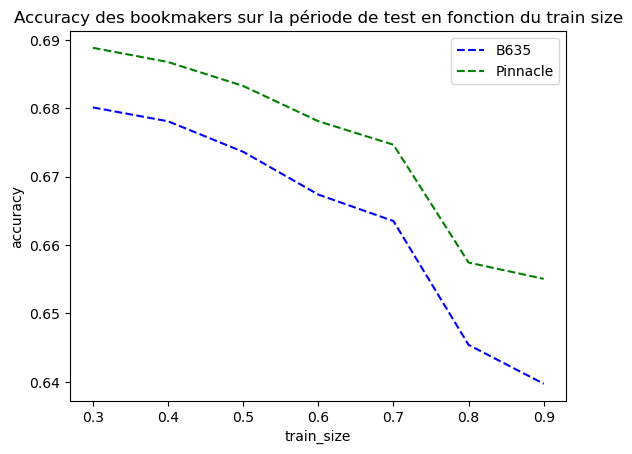

In [14]:
plt.plot(train_sizes, B365_acc, 'b--', label='B635')
plt.plot(train_sizes, PS_acc, 'g--', label='Pinnacle')
plt.legend()
plt.title('Accuracy des bookmakers sur la période de test en fonction du train size')
plt.xlabel('train_size')
plt.ylabel('accuracy')
plt.show()

In [24]:
# Accuracy des bookmakers sur un test_size de 30% servant de comparaison pour nos modélisations
print('B365:', str(round(B365_acc[4]*100,2)),'%')
print('Pinnacle:', str(round(PS_acc[4]*100,2)),'%')

B365: 66.35 %
Pinnacle: 67.47 %
